In [43]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from binet import binet
from util import Number, random_matrix
from strassen import Strassen
import time
from tqdm import tqdm

In [44]:
def reset_number_counter() -> None:
    Number.add_count = 0
    Number.sub_count = 0
    Number.mul_count = 0
    Number.div_count = 0

In [41]:
type operation_count = tuple[int, int, int, int]
reset_number_counter()
def analyse_matmul(A: np.ndarray, B: np.ndarray, func) -> tuple[operation_count, float]:
    start = time.time()
    func(A, B)
    duration = time.time() - start

    ops = Number.add_count, Number.sub_count, Number.mul_count, Number.div_count
    reset_number_counter()

    return ops, duration

In [45]:
df_binet = pd.DataFrame(columns=["A.size", "B.size", "Time", "Additions", "Subtractions", "Multiplications", "Divisions"])
df_strassen = pd.DataFrame(columns=["A.size", "B.size", "Time", "Additions", "Subtractions", "Multiplications", "Divisions"])

test_range = [2**i for i in range(0, 11, 1)]

for i in tqdm(test_range):
    A = random_matrix(i)
    B = random_matrix(i)
    (add, sub, mul, div), duration = analyse_matmul(A, B, binet)
    df_binet.loc[i - 1] = {"A.size": A.shape[0], "B.size": B.shape[0], "Time": duration, "Additions": add, "Subtractions": sub, "Multiplications": mul, "Divisions": div}
    (add, sub, mul, div), duration = analyse_matmul(A, B, Strassen)
    df_strassen.loc[i - 1] = {"A.size": A.shape[0], "B.size": B.shape[0], "Time": duration, "Additions": add, "Subtractions": sub, "Multiplications": mul, "Divisions": div}


100%|██████████| 3/3 [00:00<00:00, 347.66it/s]


Text(0, 0.5, 'Time [s]')

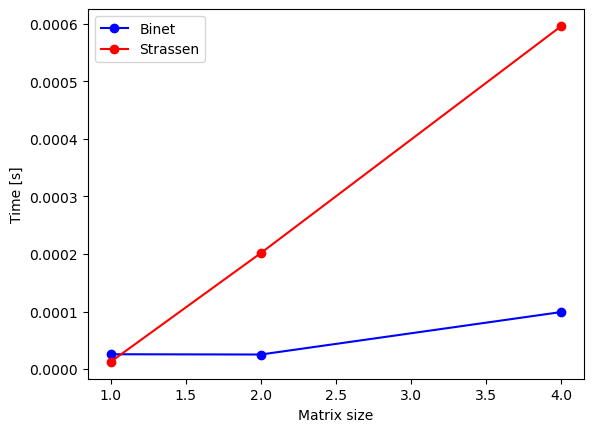

In [46]:
X = df_binet["A.size"]


plt.plot(X, df_binet["Time"], marker="o", color="blue", label="Multiplication time")
plt.plot(X, df_strassen["Time"], marker="o", color="red", label="Multiplication time")
plt.legend(["Binet", "Strassen"], loc="upper left")
plt.xlabel("Matrix size")
plt.ylabel("Time [s]")

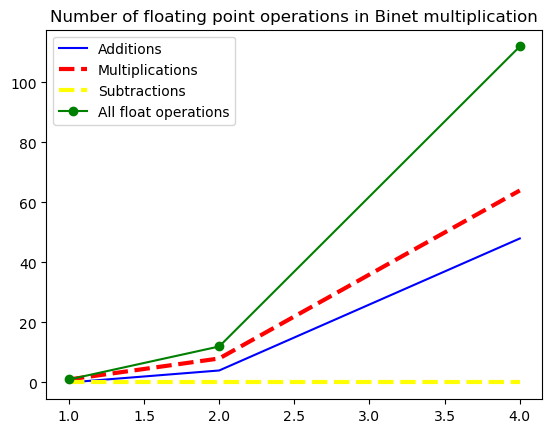

In [47]:
plt.plot(X, df_binet["Additions"], color="blue", label="Additions")
plt.plot(X, df_binet["Multiplications"], color="red", label="Multiplications", linewidth=3, linestyle="--")
plt.plot(X, df_binet["Subtractions"], color="yellow", label="Subtractions", linewidth=3, linestyle="--")
plt.plot(X, df_binet["Additions"] + df_binet["Multiplications"] + df_binet["Subtractions"], color="green", marker="o", label="All float operations")
plt.title("Number of floating point operations in Binet multiplication")
plt.legend()

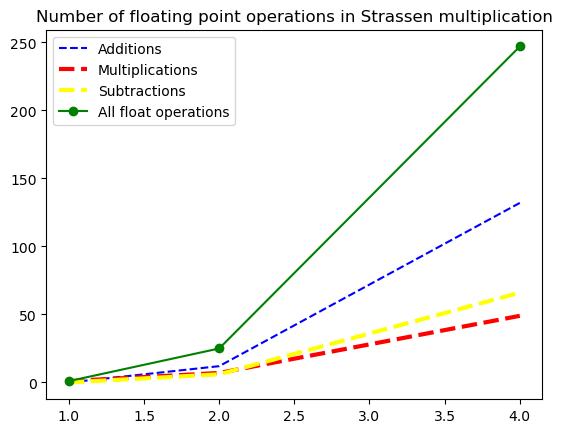

In [51]:
plt.title("Number of floating point operations in Strassen multiplication")
plt.plot(X, df_strassen["Additions"], color="blue", label="Additions", linestyle="--")
plt.plot(X, df_strassen["Multiplications"], color="red", label="Multiplications", linewidth=3, linestyle="--")
plt.plot(X, df_strassen["Subtractions"], color="yellow", label="Subtractions", linewidth=3, linestyle="--")
plt.plot(X, df_strassen["Additions"] + df_strassen["Multiplications"] + df_strassen["Subtractions"], color="green", marker="o", label="All float operations")

plt.legend()

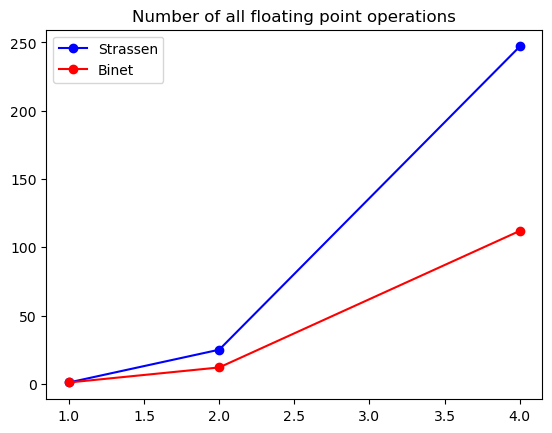

In [49]:
plt.plot(X, df_strassen["Additions"] + df_strassen["Multiplications"] + df_strassen["Subtractions"], color="blue", marker="o", label="Strassen")
plt.plot(X, df_binet["Additions"] + df_binet["Multiplications"] + df_binet["Subtractions"], color="red", marker="o", label="Binet")
plt.title("Number of all floating point operations")
plt.legend()

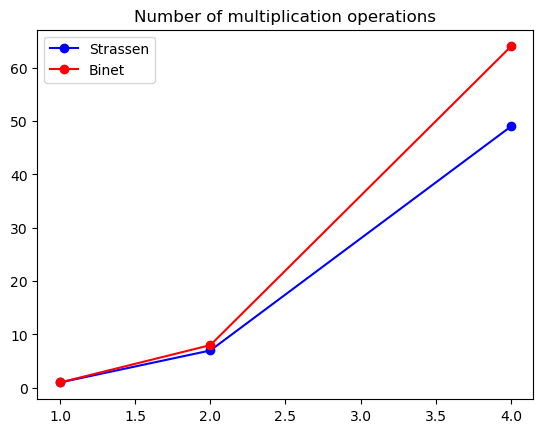

In [50]:
plt.plot(X, df_strassen["Multiplications"], color="blue", marker="o", label="Strassen")
plt.plot(X, df_binet["Multiplications"], color="red", marker="o", label="Binet")
plt.title("Number of multiplication operations")
plt.legend()